In [1]:
def RungeKutta_vectorial(a, b, n, F, Y0):
    h = (b-a)/n
    t = np.linspace(a, b, n+1)

    k = Y0.shape[0]
    y = np.zeros((k, n+1)) # almaceno las soluciones en un vector de k filas (las k ecuaciones) y n+1 columnas (1 por cada salto en h)
                           # el (n+1) es porque incluye al 0
    y[:, 0] = Y0

    for i in range (1, n+1):
        K1 = F(t[i-1], y[:,i-1])
        K2 = F(t[i-1] + h, y[:, i-1] + h * K1)
        y[:, i] = y[:, i-1] + h * ((1/2)*K1 + (1/2)*K2)

    return t, y

# Clase 1 - 19 de marzo


### Problema
$$y' = \lambda y$$
$$y(0)=1$$

$$y[i+1] = y[i] - \lambda h y[i]$$

$$\frac{y(x+h)-h(x)}{h} = y(x)$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

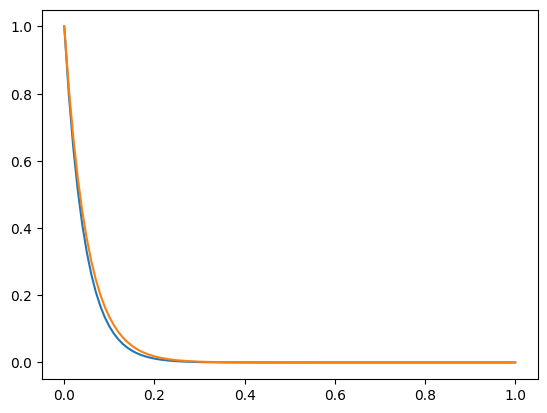

In [ ]:
n_pasos = 100
h = 0.01 # tamaño del paso
y0 = 1
lmb = 20

y = np.zeros(n_pasos+1)
y[0] = y0
for i in range(n_pasos):
  y[i+1] = y[i] - lmb * h * y[i]


x = np.arange(n_pasos+1)*h
z = [np.exp(-lmb*i) for i in x]

plt.plot(x,y)
plt.plot(x,z)
plt.show()

### Problema

$$y''(t) + γ . y'(t) + \frac{k}{m} . y(t) = A . sen(3t)$$

Vamos a reducir dimensiones al precio de aumentar las ecuaciones. Llamamos
$$v= y'$$
$$v' = y''$$

Entonces, despejando $y''$ tenemos:
$$v' = - γ . v(t) + \frac{k}{m} . y(t) + A . sen(3t)$$

$$y'= v$$

Y utilizando el **Metodo de Euler** (y el despeje tradicional que se desprende de la definición de derivada) tenemos que:

$$v[i+1] = v[i] + h . (- γ . v[i] - \frac{k}{m} . y[i] + A . sen(3t))$$
$$y[i+1] = y[i]+h . v[i]$$


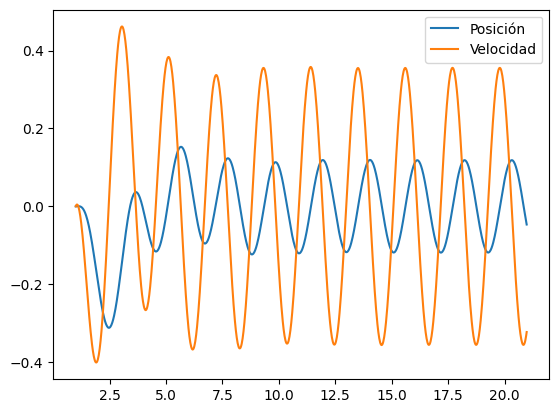

In [ ]:
gamma = 1
k = 1
m = 1
A = 1
n_pasos = 1000
h = 20/(n_pasos +1)


v = np.zeros(n_pasos+1)
y = np.zeros(n_pasos+1)
v[0] = 0
y[0] = 0

x = np.arange(1,21,h)
for i in range(n_pasos):
    v[i+1] = v[i] + h * (-gamma * v[i] - k/m * y[i] + A * np.sin(3*x[i]))
    y[i+1] = y[i] + h * v[i]

plt.plot(x,y)
plt.plot(x,v)
plt.legend(["Posición", "Velocidad"])
plt.show()


## Método de Heun

$$y[i+i] = y[i] + \frac{h}{2} [f(t[i], y[i]) + f(t[i+1], y[i] + h f(y[i], t[i])) ]$$


In [ ]:
def Heun(a,b,N,F,y0):
    h=(b-a)/N
    t=np.linspace(a,b,N+1)
    y=np.zeros((2,N+1))
    y[:,0]=y0

    for k in range (1, N+1):
        K1 = F(t[k-1], y[:,k-1])
        K2 = F(t[k-1] + (2/3)*h, y[:,k-1] + (2/3)*h*K1)
        y[:,k] = y[:,k-1] + ((1/4)*K1 + (3/4)*K2) * h

    return (t,y)



In [ ]:
def G(t,X):
    # X = [y(t), v(t)]
    return np.array([X[1], -gamma*X[1] - (k/m) *X[0] + A*np.sin(t)])


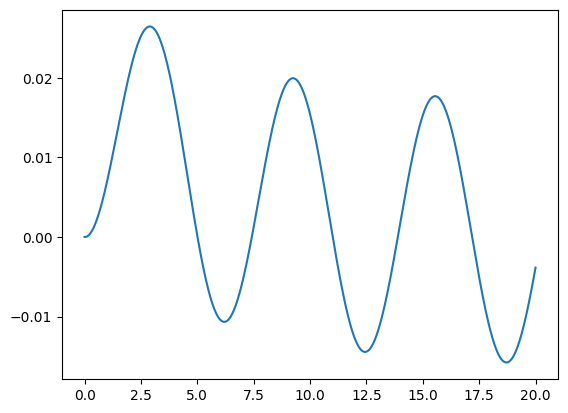

In [ ]:
N = 1000
t_max = 30
k = 10
m = 1
gamma = 60
a = 0
b = 20
y0 = np.array([0,0])
t,Sol = Heun(a,b,N,G,y0)

plt.plot(t,Sol[0,:])
# plt.plot(t,Sol[1,:])
# plt.legend(["Posición", "Velocidad"])
plt.show()




# Clase 2 - 26 de marzo

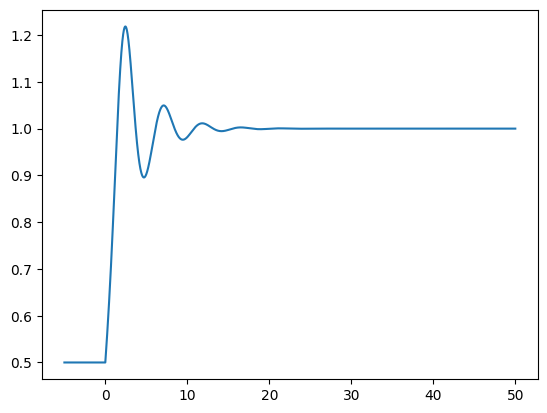

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def hutchinson(a, b,tau=1, k=1, lmbd=1):
    z= 100 # 1 segundo = z-1 particiones
    n = (b-a)*z
    t = np.linspace(a,b,n+1)
    y = np.zeros(t.size)
    h = 1/z
    tau_prime = tau/h
    for i in range(t.size):
        if t[i] < 0:
            y[i] = 0.5
        else:
            y[i]=y[i-1]+h*(lmbd * y[i-1] * (1- y[int((i-1)-tau_prime)]/k))
    return t,y


t,n = hutchinson(tau=1, k=1, lmbd=1, a=-5, b=50)
plt.plot(t,n)
plt.show()




100000


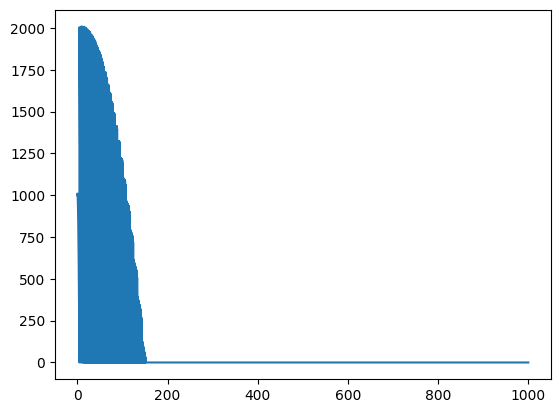

In [42]:
def ej16a(vx0, vy0, h0, tiempo, h):
    g = 10
    t0 = 0
    t = np.arange(t0, tiempo, h)
    x = np.zeros(t.size)
    vy = np.zeros(t.size)
    y = np.zeros(t.size)
    print(y.size)
    y[0] = h0
    vy[0] = vy0
    x[0]= 0
    for i in range(1, t.size):
        time = t[i]
        x[i] = vx0 * time
        y[i] = h0 + vy[i-1] - 0.5 * g * time**2
        vy[i] = vy[i-1] - g * time
        if y[i] < 0:
            y[i] = 0
            vy[i] = -vy[i]
    return t,x,y,vy

t,x,y,vy = ej16a(10, 10, 1000, 100, 0.001)
plt.plot(x,y)
plt.show()




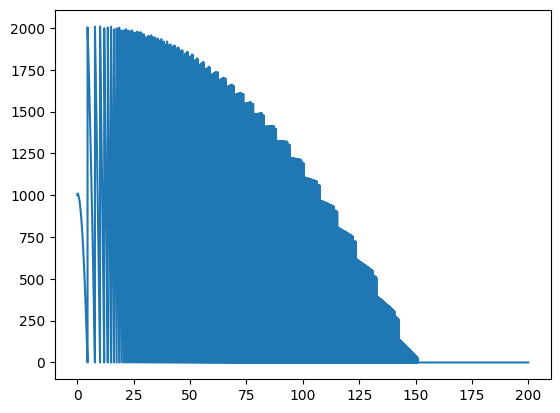

In [44]:
plt.plot(x[:20000],y[:20000])
plt.show()

# Clase 3 - 9 de abril


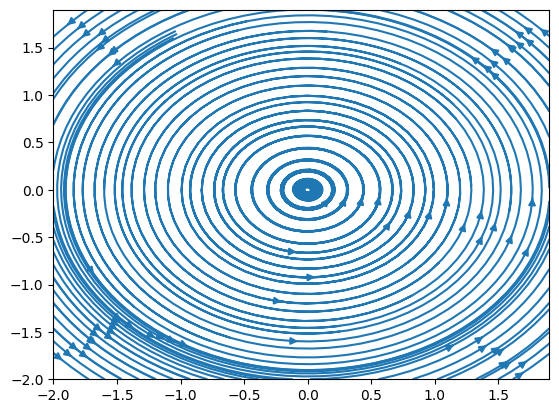

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
def sistema_strogatz(t, XY):
    x, y = XY
    dxdt = -y+a*x*(x**2+y**2)
    dydt = x+a*y*(x**2+y**2)
    return dxdt, dydt

X_vals = np.arange(-2, 2, 0.1)
Y_vals = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X_vals, Y_vals)

dX, dY = np.zeros_like(X), np.zeros_like(Y)
t= 0

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dxdt, dydt = sistema_strogatz(t, np.array([X[i,j], Y[i,j]]))
        dX[i,j] = dxdt
        dY[i,j] = dydt

plt.streamplot(X,Y, dX, dY, broken_streamlines=False)

In [ ]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np

def plot_strogatz(a):
    def sistema_strogatz(t, XY):
        x, y = XY
        dxdt = -y + a*x*(x**2 + y**2)
        dydt = x + a*y*(x**2 + y**2)
        return dxdt, dydt

    X_vals = np.arange(-1, 1, 0.5)
    Y_vals = np.arange(-1, 1, 0.1)
    X, Y = np.meshgrid(X_vals, Y_vals)

    dX, dY = np.zeros_like(X), np.zeros_like(Y)
    t = 500

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dxdt, dydt = sistema_strogatz(t, np.array([X[i, j], Y[i, j]]))
            dX[i, j] = dxdt
            dY[i, j] = dydt

    plt.figure(figsize=(10, 10))
    plt.streamplot(X, Y, dX, dY, density=1.2, arrowsize=1.2)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()

interact(plot_strogatz, a=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0))

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.plot_strogatz(a)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_sistema(a):
    def sistema_strogatz(t, XY):
        x, y = XY
        dxdt = -y + a * x * (x**2 + y**2)
        dydt = x + a * y * (x**2 + y**2)
        return dxdt, dydt

    X_vals = np.arange(-2, 2, 0.1)
    Y_vals = np.arange(-2, 2, 0.1)
    X, Y = np.meshgrid(X_vals, Y_vals)

    dX, dY = np.zeros_like(X), np.zeros_like(Y)
    t = 0

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dxdt, dydt = sistema_strogatz(t, np.array([X[i,j], Y[i,j]]))
            dX[i,j] = dxdt
            dY[i,j] = dydt

    # Normalización para evitar problemas en streamplot
    magnitude = np.sqrt(dX**2 + dY**2)
    magnitude[magnitude == 0] = 1  # Evita división por cero
    dX_norm = dX / magnitude
    dY_norm = dY / magnitude

    plt.figure(figsize=(6, 6))
    plt.streamplot(X, Y, dX_norm, dY_norm, density=1.2, arrowsize=1.2)
    plt.title(f'Diagrama de fases para a = {a}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

interact(plot_sistema, a=FloatSlider(value=0, min=-1, max=1, step=0.05))

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0, step=0.05), Output()), _dom_c…

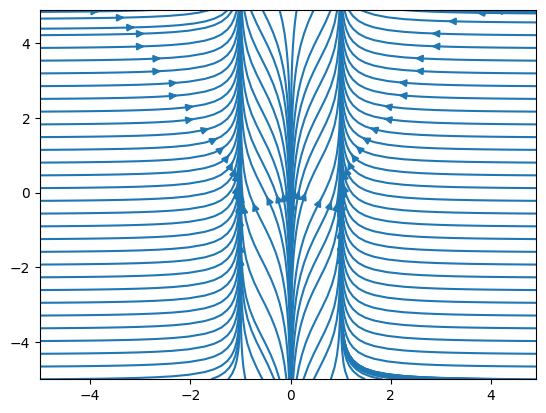

In [ ]:
def sistema_strogatz_2(t, RTheta):
    r, Theta = RTheta
    drdt = r*(1-r**2)
    dThetadt = 1
    return drdt, dThetadt

R_vals = np.arange(-5, 5, 0.1)
Theta_vals = np.arange(-5, 5, 0.1)
R, Theta = np.meshgrid(R_vals, Theta_vals)

dR, dTheta = np.zeros_like(R), np.zeros_like(Theta)
t= 0


for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        drdt, dthetadt = sistema_strogatz_2(t, np.array([R[i,j], Theta[i,j]]))
        dR[i,j] = drdt
        dTheta[i,j] = dthetadt

plt.streamplot(R,Theta, dR, dTheta, broken_streamlines=False)

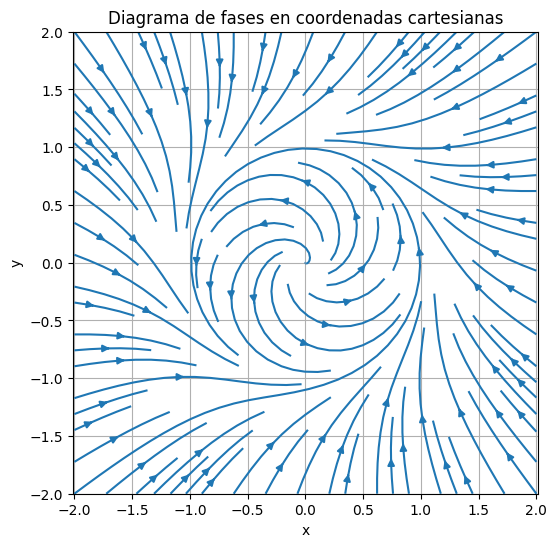

In [65]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-2, 2, 30)
y_vals = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x_vals, y_vals)

dX = np.zeros_like(X)
dY = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i, j]
        y = Y[i, j]
        r = np.sqrt(x**2 + y**2)
        theta = np.arctan2(y, x)
        
        drdt, dthetadt = sistema_strogatz_2(r, theta)

        # Derivadas cartesianas con regla de la cadena
        dxdt = drdt * np.cos(theta) - r * np.sin(theta) * dthetadt
        dydt = drdt * np.sin(theta) + r * np.cos(theta) * dthetadt

        dX[i, j] = dxdt
        dY[i, j] = dydt

plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, dX, dY, density=1)
plt.title("Diagrama de fases en coordenadas cartesianas")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True)
plt.show()

In [64]:
u = 1.5

def plot_sistema(u):
    def van_der_pol(t, X):
        x1, x2 = X
        dx1dt = x2
        dx2dt = -u * (x1**2-1) *x2 - x1
        return np.array([dx1dt, dx2dt])

    X_vals = np.arange(-30, 30, 0.5)
    Y_vals = np.arange(-30, 30, 0.5)
    X, Y = np.meshgrid(X_vals, Y_vals)

    dX, dY = np.zeros_like(X), np.zeros_like(Y)
    t = 0

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dxdt, dydt = van_der_pol(t, np.array([X[i,j], Y[i,j]]))
            dX[i,j] = dxdt
            dY[i,j] = dydt

    plt.figure(figsize=(10,10))
    plt.streamplot(X, Y, dX, dY, broken_streamlines=False, density=1.1, linewidth=0.8)
    plt.show()

interact(plot_sistema, u=FloatSlider(value=0, min=-5, max=5, step=0.25))

interactive(children=(FloatSlider(value=0.0, description='u', max=5.0, min=-5.0, step=0.25), Output()), _dom_c…

<function __main__.plot_sistema(u)>

# Clase 4 - 16 de abril

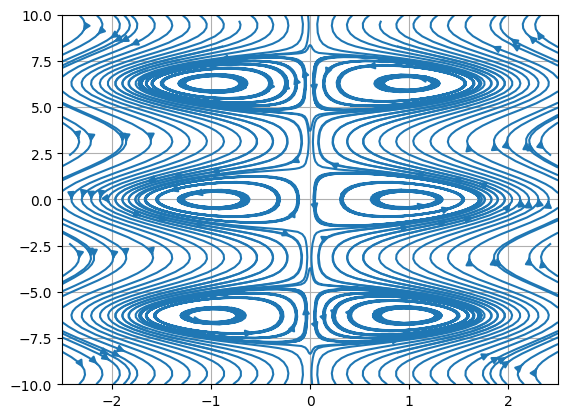

In [22]:
import numpy as np
import matplotlib.pyplot as plt

D = 0

def strogatz_parcial(t, X):
    V, Theta = X
    return np.array([-np.sin(Theta)-D*(V**2),
                     -np.cos(Theta)/V + V])

V_vals, Theta_vals = np.linspace(-2.5, 2.5, 100), np.linspace(-10, 10, 100)
V, Theta = np.meshgrid(V_vals, Theta_vals)

dV, dTheta = np.zeros_like(V), np.zeros_like(Theta)

for i in range(V.shape[0]):
    for j in range(V.shape[1]):
        dV[i, j], dTheta[i, j] = strogatz_parcial(0, np.array([V[i,j], Theta[i,j]]))

plt.streamplot(V, Theta, dV, dTheta, broken_streamlines=False)
plt.grid()
plt.show()

## Parcial machete exactas - 1er cuatri 2024

### Ejercicio 1

#### Inciso 2

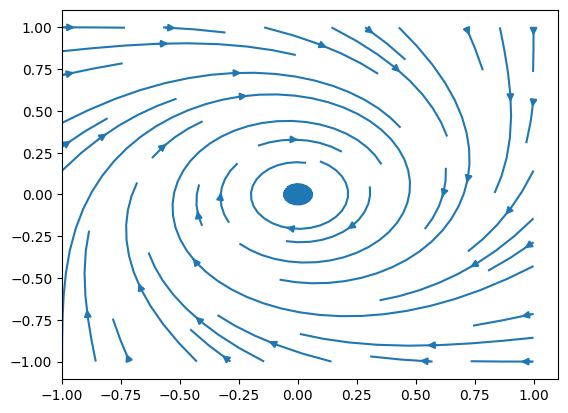

In [47]:
a= -.5
def ej1(t, XY):
    x, y = XY
    return np.array([y + a * x * (x**2 + y**2), 
                     -x+a * y * (x**2 + y**2)])

X_vals, Y_vals = np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(X_vals, Y_vals)

dX, dY = np.zeros_like(X), np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dX[i, j], dY[i, j] = ej1(0, np.array([X[i, j], Y[i,j]]))

plt.streamplot(X, Y, dX, dY, broken_streamlines=True, density=.5)
plt.show()

### Ejercicio 2

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def RungeKutta(a, b, n, F, Y0):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = np.zeros((Y0.shape[0], n + 1))
    y[:, 0] = Y0

    for i in range(1, n + 1):
        K1 = F(t[i - 1], y[:, i - 1])
        K2 = F(t[i - 1], y[:, i - 1] + h * K1)
        y[:, i] = y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)

    return t, y


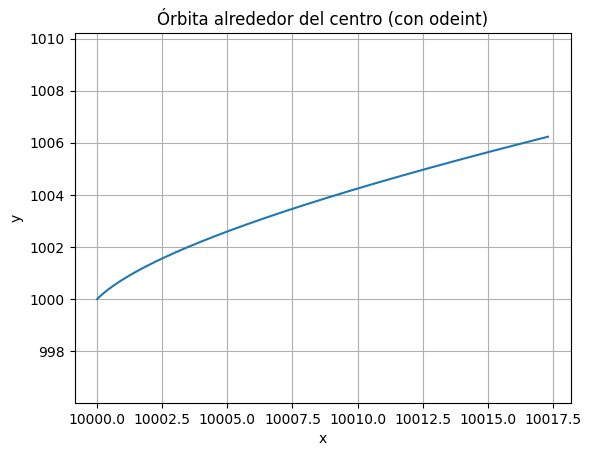

In [14]:
def ej2_i(Z, t):
    x1, y1, x2, y2 = Z
    dX1 = x2
    dY1 = y2
    dX2 = x1/((x1**2 + y1**2)**(3/2))
    dY2 = y1/((x1**2 + y1**2)**(3/2))

    return np.array([dX1, dY1, dX2, dY2])


Z0 = [10000, 1000, 0.0001, 0.0001]
t = np.linspace(0, 50000, 500000)  # Tiempo entre 0 y 50000, con muchas divisiones

sol = odeint(ej2_i, Z0, t)
x1 = sol[:, 0]
y1 = sol[:, 1]

plt.plot(x1, y1)
plt.axis("equal")
plt.title("Órbita alrededor del centro (con odeint)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

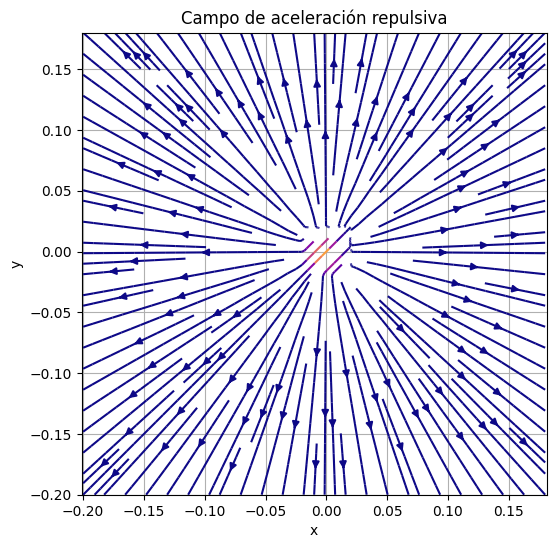

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Malla de puntos
X_vals = np.arange(-0.2, 0.2, 0.02)
Y_vals = np.arange(-0.2, 0.2, 0.02)
X, Y = np.meshgrid(X_vals, Y_vals)

# Aceleraciones (repulsivas)
R = np.sqrt(X**2 + Y**2)
dX = X / R**3
dY = Y / R**3

# Evitar división por cero
dX[R == 0] = 0
dY[R == 0] = 0

plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, dX, dY, color=np.sqrt(dX**2 + dY**2), cmap='plasma', density=1.5)
plt.title("Campo de aceleración repulsiva")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis("equal")
plt.show()

#### Inciso 2

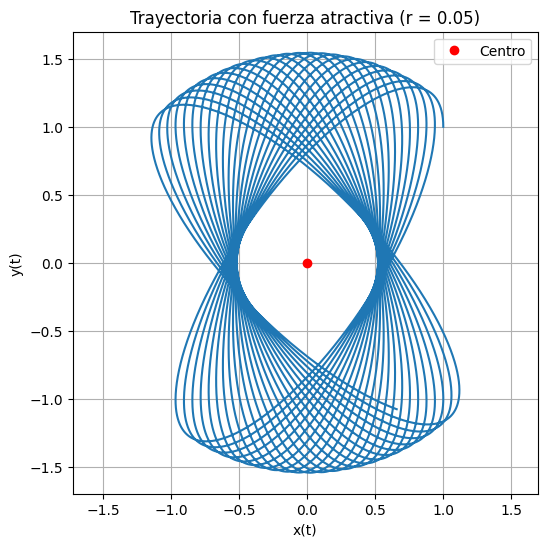

In [78]:
import numpy as np
import matplotlib.pyplot as plt
global r
def sistema(t, u):
    global r 
    r=0.05
    x, y, vx, vy = u
    denominador = (x**2 + y**2)**r + 1e-10  # evitar división por cero
    ax = -x / denominador
    ay = -y / denominador
    return np.array([vx, vy, ax, ay])

# Condiciones iniciales y simulación
Y0 = np.array([1, 1, 0.0, 0.8])
t, Sol = RungeKutta(0, 150, 1000000, sistema, Y0)


# Gráfico de la trayectoria

plt.figure(figsize=(6,6))
plt.plot(Sol[0], Sol[1])
plt.plot(0, 0, 'ro', label='Centro')
plt.title(f'Trayectoria con fuerza atractiva (r = {r})')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

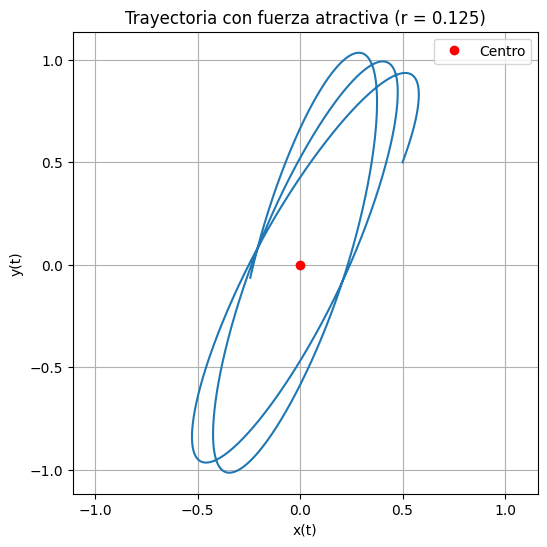

In [101]:
import numpy as np
import matplotlib.pyplot as plt
global r
def sistema(t, u):
    global r 
    r=1/8
    x, y, vx, vy = u
    denominador = (x**2 + y**2)**r   # evitar división por cero
    ax = -x / denominador
    ay = -y / denominador
    return np.array([vx, vy, ax, ay])

# Condiciones iniciales y simulación
Y0 = np.array([0.5, 0.5, .3, .8])
t, Sol = RungeKutta(0, 15, 1000000, sistema, Y0)


# Gráfico de la trayectoria
plt.figure(figsize=(6,6))
plt.plot(Sol[0], Sol[1])
plt.plot(0, 0, 'ro', label='Centro')
plt.title(f'Trayectoria con fuerza atractiva (r = {r})')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()